# **Estatistica descritiva básica**

In [1]:
import seaborn as sns
sns.set_palette("Set1", 8, .75)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from src.intro_desc_stats import prepare_data, display_side_by_side


## **TOC:**
- [Tipo de variáveis](#variables_types)

---

- [Probabilidade](#proba)

    - [Variáveis Aleatórias](#random_var)
    
    - [Espaço amostral](#espaco_amostral)
    
    - [Conjuntos](#conjuntos)
    
    - [Definição de Probabilidade](#def_prob)

---

- [Distribuição de Probabilidade](#dist_proba)

    - [Distribuição Uniforme](#dist_uni)
    - [Distribuição Gaussiana](#dist_gaus)

---

- [Estatística Descritiva](#desc_stat)

    - [Medidas de Tendência Central](#tendencia_central)
    - [Medidas de Dispersão](#medidas_dispersao)

---

- [Outliers](#outliers)
    - [Z score](#z_score)
    - [Boxplot whisker (IQR)](#iqr_outlier)

## **Tipos de variáveis** <a class="anchor" id="variables_types"></a>

* **Nominal**: Escala de medição em que os números servem apenas como rótulos e não indicam nenhuma relação quantitativa. Exemplos: sexo, estado civil, país de origem, ser fumante ou não, etc.

* **Ordinais**: Escala de medição em que os números são postos; diferenças iguais entre números não representam diferenças iguais entre as coisas medidas. Exemplo: escolaridade, resposta de um paciente(piora, igual, melhora), classe social(alta, média,baixa)

* **Interval**: Escala de medição na qual diferenças iguais entre números representam diferenças iguais na coisa medida. O ponto zero é definido arbitrariamente.

* **Ratio Variables**: Escala de medição com características de escala intervalar, mas possui um *ponto zero verdadeiro*.


\begin{array}{lcccl}
\hline \text{Tipo de variavel}  & \text{transmite} \leq & \text{transmite} = & \text{Possuí zero verdadeiro} & \text{Exemplo}\\\hline
       \text{Nominal ou Categorical}               & Não                   & Não                & Não  & \text{Diagnóstico psicólogico, Tipos de Personalidade}\\
       \text{Ordinal ou Ranked}               & Sim                  & Não                & Não  & \text{Posição de chegada de uma corrida}\\
       \text{Interval}              & Sim                  & Sim               & Não  & \text{Celsius, Teste de QI}\\
       \text{Ratio}                 & Sim                  & Sim               & Sim & \text{Altura, Peso}\\
\hline
\end{array}

Diferença entre variáveis ***Interval*** e ***Ratio***:

- Converta $ 100 ^\circ C$ e $ 50 ^\circ C$ para Fahrenheit (F = 1,8C + 32) e de repente a relação "duas vezes mais" desaparece.
- Converta 16 kg e 4 kg para libras (1 kg = 2,2 lbs) e a relação "quatro vezes mais pesado" é mantido.

A diferença é sutil. Portanto, essas variáveis são referenciadas como <font color="orange"><b>variáveis contínuas</b></font>.

## **Probabilidade** <a class="anchor" id="proba"></a>

<center><img src="figures/pop_amostral.png" align="center" width=450/></center>

Probabilidade é a área da matemática que estuda eventos aleatórios, cujos resultados são probabilísticos ou estocásticos.

Existem poucos sistemas na natureza que são de fato inerentemente aleatórias e não-determinísticas. No entanto, uma descrição determinística pode ser muito complicada, de modo que se torna conveniente tratar o sistema como um sistema estocástico.

Exemplos: lanaçamento de moeda, lançamento de dados, etc.

O objetivo da estatística é similar: analisar dados ou criar modelos que generalizem relações que não podem ser determinadas diretamente uma vez que não temos acesso à população. Neste sentido, há muita probabilidade envolvida em estatística, e é por isso que vamos olhar para os principais conceitos de probabilidade.

### **Variável aleatória** <a class="anchor" id="random_var"></a>

Variáveis aleatórias são normalmente denotadas por uma letra capital como **X**.

**Mais formalmente:** Uma função que mapeia um "espaço de probabilidades" na reta real $\mathbb{R}$.

**Menos formal:** Uma função que mapeia o desfecho de um processo aleatório (Exemplo: jogar uma moeda) para números reais (probabilidades). 

### **Espaço amostral**  <a class="anchor" id="espaco_amostral"></a>

Chamamos de **espaço amostral** o conjunto de **todos os resultados possíveis de um certo fenômeno aleatório**, ou seja, os valores possíveis que a **variável aleatória de interesse pode assumir**. Representamos o espaço amostral pela letra grega $\omega$.

Os subconjuntos de $\omega$ são denominados **eventos** e representados pelas letras maiúsculas A, B, etc...


**Exemplo:** Qual o espaço amostral dos resultadosdo lançamento de um dado?

$$
\omega = \{1,2,3,4,5,6\}
$$

Alguns eventos possíveis são:

- Evento A = \{3\}: o resultado do lançamento do dado foi 3;
- Evento B = \{5\}: o resultado do lançamento do dado foi 5;

**Exercicio 1:** Qual o espaço amostral do resultado do lançamento de uma moeda?

**Exercicio 2:** Qual o espaço amostral do resultado do lançamento de duas moedas?

### **Conjuntos** <a class="anchor" id="conjuntos"></a>

In [2]:
A = {2,4,6}
B = {2,3,5}

- O conjunto vazio é denotado por $\emptyset$ e equivale a um conjunto sem nenhum elemento.
- A <font color="orange"><b>união</b></font> de dois eventos A e B, denotado por $\cup$ representa a ocorrência de pelo menos um dos eventos A ou B.
- A <font color="orange"><b>intersecção</b></font> do evento A com B, denotado por $\cap$ é a ocorrência simultânea de A e B.

<center><img src="figures/union_intersection.png" align="center" width=250/></center>

In [3]:
print(A.union(B))
print(A.intersection(B))

{2, 3, 4, 5, 6}
{2}


Dois eventos A e B são disjuntos ou <font color="orange"><b>mutualmente exclusivos</b></font> quando não têm elemento em comum. Isto é, A $\cap$ B = $\emptyset$.

<center><img src="figures/mutu_exclusive.png" align="center" width=200/></center>


In [4]:
X = {1,2,3}
Y = {4,5,6}
print(X.intersection(Y))

set()


Dois eventos A e B são <font color="orange"><b>complementares</b></font> se sua união é o espaço amostral e sua intersecção é vazia. O complementar de A será representado por $A^c$

<center><img src="figures/complementar.png" align="center" width=200/></center>

In [5]:
U = {1,2,3,4,5,6}

cond1 = X.union(Y) == U
cond2 = X.intersection(Y) == set()

if cond1 and cond2:
    print(r'X e Y são complementares!')
else:
    print(r'X e Y não são complementares!')

X e Y são complementares!


### **Definição de probabilidade** <a class="anchor" id="def_prob"></a>

Definimos uma função $P(.)$ denominada probabilidade que deve satisfazer as seguintes propriedades:

1. $0 \leq P(A) \leq 1 $
2. $P(\omega) = 1$
3. $P(\cup A_j) = \sum_{j=1}^{n}P(A_j) $

**Exemplo:** Suponha o lançamento de uma moeda. Temos $\omega = \{K, C\}$. 
1. Qualquer evento $A$ deve ter uma probabilidade entre 0 e 1.
2. A probabilidade de lançarmos uma moeda e ter um desfecho que esteja compreendido em $\omega$ é 1.
3. Seja $\{K\} = A_1$ e $\{C\} = A_2$ temos $P(A_1 \cup A_2)= P(A_1) + P(A_2)$

## **Distribuições de probabilidades** <a class="anchor" id="dist_proba"></a>

Uma <font color="orange"><b>distribuição de probabilidade</b></font> é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode modelar incertezas e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function). <font color="orange"><b>Esta função é tal que a probabilidade do desfecho da variável aleatória cair em uma faixa particular é dada pela integral da densidade dessa variável sobre tal faixa</b></font> - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.



<center><img src="figures/density_func.png" align="center" width=450/></center>

### **Distribuição uniforme** <a class="anchor" id="dist_uni"></a>

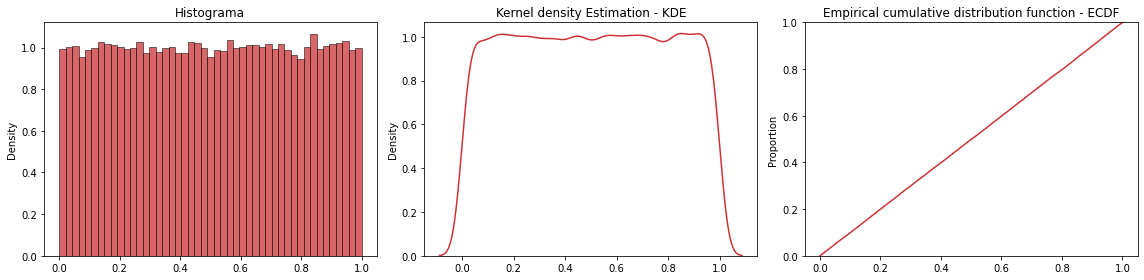

In [6]:
n_samples = 100000
x = np.random.uniform(0, 1, size=n_samples)

fig, axs = plt.subplots(1,3,figsize=(16,4))

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
plot_distribution(sns.histplot, x, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, x, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, x, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

In [7]:
p=0.5
resultados = np.where(np.random.uniform(0, 1, 1000) <= p, "K", "C")
pd.Series(resultados).value_counts(normalize=True)

K    0.515
C    0.485
dtype: float64

### **Distribuição Gaussiana** <a class="anchor" id="dist_gaus"></a>

É representada por uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino (bell shape).

A curva de distribuição normal representa o comportamento de diversos processos e fenômenos comuns, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

<font color = "orange"><b>A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos</b></font>.

Na distribuição normal, a média, mediana e moda dos dados possuem o mesmo valor.

A fórmula da da distribuição gaussiana é:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

onde $\mu$ é a média e $\sigma$ é o desvio padrão.

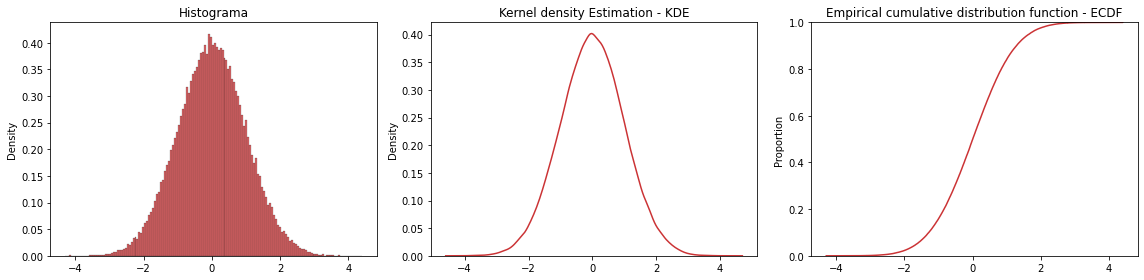

In [8]:
n_samples = 100000
x = np.random.normal(loc=0.0, scale=1.0, size=n_samples)

fig, axs = plt.subplots(1,3,figsize=(16,4))

def plot_distribution(func, x, ax, title, **kwargs):
    g = func(x, ax=ax, **kwargs)
    g.set_title(title)
    
plot_distribution(sns.histplot, x, axs[0], "Histograma", stat="density")
plot_distribution(sns.kdeplot, x, axs[1], "Kernel density Estimation - KDE")
plot_distribution(sns.ecdfplot, x, axs[2], "Empirical cumulative distribution function - ECDF")

plt.tight_layout()
plt.show()

Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<center><img src="figures/normal_distribution.png" align="center" width=450/></center>

## **Estatistica Descritiva**  <a class="anchor" id="desc_stat"></a>

Como mencionamos, o principal objetivo da **estatística descritiva** é gerar medidas que resumam o conjunto de dados que estamos analisando, ou seja, medidas que descrevam a distribuição dos dados, de forma quantitativa. Vamos dar uma olhada nessas medidas!

<center><img src="figures/desc_measures.png" align="center" width=150/></center>

#### **Medidas de tendencia central** <a class="anchor" id="tendencia_central"></a>

##### **Média** 

Seja $X$ uma variável quantitativa e $x_0,x_1,x_2, ...$ os valores assumidos por X. Define-se média de $\overline{X}$ como sendo :


$$\overline{X} = \frac{\sum_{i=0}^{n-1}x_i}{n}= \frac{x_0+ x_1 + x_2 +... +x_n}{n}$$

##### **Mediana** 

A **mediana** de uma variável é um número tal que há o mesmo número de observações maiores e menores do que ele, ocupando assim a **posição central** da série de observações.

Assim, para calcularmos a mediana, basta **ordenarmos os dados, do menor pro maior**, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")

- *Exemplo*

i) 3,4,**7**,8,8 **mediana=7**       (CASO ÍMPAR)

ii) 3,4,**7**,**8**,8,9 **mediana=(7+8)/2=7,5**   (CASO PAR)

Logo, podemos definir 

- - Mediana de $X = X_{\frac{n}{2}}$ `Se tamanho da amostra par`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}}+ X_{\frac{n}{2}}}{2}$ `Se tamanho da amostra ímpar`

##### **Quartis**

Quartis (Q1, Q2 e Q3): São valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem os dados **em quatro partes iguais**. 

- O primeiro quartil, Q1, é o número que deixa 25% das observações abaixo e 75% acima;
- O segundo quartil, Q2 é a **mediana**, deixa 50% das observações abaixo e 50% das observações acima;
- O terceiro quartil, Q3, deixa 75% das observações abaixo e 25% acima;


<img src="https://aprendendogestao.com.br/wp-content/uploads/2016/07/QE-Figura-1.png" width="700" height="700" />

##### **Moda**

A **moda** é o valor que ocorre com **maior frequencia** em um conjunto de dados 

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete 

- unimodal: Quando existe apenas um valor repetido com maior frequência 

- multimodal: quando existem mais de um valor com a mesma frequência máxima 

#### **Medidas de dispersão** <a class="anchor" id="medidas_dispersao"></a>

##### **Intervalo Interquartílico (IQR - interquantile range)** 

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como **um intervalo de valores tipicamente assumidos pelas observações**, e também é uma **medida de dispersão**, pois nos dá uma ideia da variação que existe entre o Q1 e o Q3!

##### **Amplitude**

A amplitude é a **diferença entre o maior e o menor valor observado**. 

- **Fortemente influenciada** por valores extremos nas observações, como outliers. 

##### **Variância**

A variância representa **o quanto os dados se afastam da média, em geral**. Por definição, tomamos a média dos **desvios quadráticos da média**:

$$ Var(X) = \sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}$$

##### **Desvio padrão**

Note que, da forma como foi definida, a variância é um valor **quadrático** nos dados. Para evitar isso, é comum tirar a raiz quadrada da variância, o que define o **desvio padrão**:

$$ \sigma(X) \equiv \sqrt{Var(X)} = \sqrt{\sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}}$$

##### **Assimetria - skewness**

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição.

Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**.

Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:

<center><img src="figures/asymmetry.png" align="center" width=550/></center>


- Distribuição assimétrica **Negativa ou enviesada a esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **Positiva ou enviesada a direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direira
- s < 0: assimetria à esquerda

## **Outliers** <a class="anchor" id="outliers"></a>

**Outliers** ou **discrepantes** referem-se a obsevações **extremas**, que se deslocam em muito das outras observações em um conjunto de dados, ou seja, que **destoam do padrão da distribuição** dos dados.

Outliers podem existir por motivos diferentes, alguns dos quais são:

- erro na entrada de dados (erro humano);
- erro na medição/coleta dos dados (erro instrumental);
- erros experimentais (planejamento/execução dos experimentos);
- outliers naturais (não decorrente de erros)

No caso dos erros, é importante que os outliers sejam tratados (comumente são removidos).

Por outro lado, outliers naturais são importantes constituintes dos dados, de modo que não devem ser eliminados -- mas, muitas vezes, devem ser tratados.

De qualquer modo, antes de começarmos a pensar em como **tratar** os outliers, o primeiro passo é **identifica-los**. Para discussões interessantes sobre outliers, como identificá-los e tratá-los, dê uma olhada [neste post](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623) ou [neste](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561).

---

### **Z-score** <a class="anchor" id="z_score"></a>

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**

In [9]:
df_wh = pd.read_csv('data/weight-height.csv')
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54
# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

,Gender,Height,Weight
0,Male,187.571423,109.722200
1,Male,174.706036,73.623547
2,Male,188.239668,96.498619
3,Male,182.196685,99.810610
4,Male,177.499761,93.599656
...,...,...,...
9995,Female,168.078536,62.041846
9996,Female,170.350573,77.505174
9997,Female,162.224700,58.276022
9998,Female,175.346978,74.322989


As variáveis numéricas parecem estar normalmente distribuídas?

In [10]:
display(df_wh.describe())

print("Parece que sim, pois a média e mediana são bem próximas!")

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228865
std,9.772721,14.564292
min,137.828359,29.347785
25%,161.304276,61.606664
50%,168.447898,73.125704
75%,175.702625,84.899540
max,200.656806,122.466524


Parece que sim, pois a média e mediana são bem próximas!


In [11]:

male = df_wh[df_wh["Gender"] == "Male"].copy()
female = df_wh[df_wh["Gender"] == "Female"].copy()

male["z_height"] = male["Height"].apply(lambda x: (x-male["Height"].mean())/male["Height"].std())
male["z_weight"] = male["Weight"].apply(lambda x: (x-male["Weight"].mean())/male["Weight"].std())

female["z_height"] = female["Height"].apply(lambda x: (x-female["Height"].mean())/female["Height"].std())
female["z_weight"] = female["Weight"].apply(lambda x: (x-female["Weight"].mean())/female["Weight"].std())

In [12]:
print("Outliers homens apenas para a altura:")
display(male[male["z_height"].abs() > 3])

print("\nOutliers homens apenas para o peso:")
display(male[male["z_weight"].abs() > 3])

print("\n ############################################### \n")

print("Outliers mulheres apenas para a altura:")
display(female[female["z_height"].abs() > 3])

print("\nOutliers mulheres apenas para o peso:")
display(female[female["z_weight"].abs() > 3])

Outliers homens apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
994,Male,198.363503,115.980602,3.167438,3.471497
1238,Male,153.322811,60.848611,-3.025476,-2.672937
1317,Male,199.293614,103.121911,3.295324,2.038402
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2014,Male,200.656806,122.466524,3.482758,4.194350
2191,Male,152.244170,64.165644,-3.173785,-2.303255
2334,Male,150.826850,61.866554,-3.368661,-2.559487
2527,Male,153.083534,57.359890,-3.058376,-3.061753
2974,Male,153.078663,60.304898,-3.059046,-2.733533
3020,Male,152.951227,66.659097,-3.076568,-2.025361



Outliers homens apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
565,Male,156.855185,56.031998,-2.539789,-3.209746
994,Male,198.363503,115.980602,3.167438,3.471497
1506,Male,192.274490,113.202226,2.330223,3.161848
1610,Male,194.608567,116.058844,2.651149,3.480217
1750,Male,189.495857,113.374890,1.948172,3.181092
1942,Male,152.353937,51.212437,-3.158693,-3.746883
2014,Male,200.656806,122.466524,3.482758,4.194350
2070,Male,196.762546,114.558963,2.947312,3.313056
2417,Male,160.411852,54.088205,-2.050762,-3.426381
2500,Male,155.129197,55.647334,-2.777105,-3.252616



 ############################################### 

Outliers mulheres apenas para a altura:


,Gender,Height,Weight,z_height,z_weight
5103,Female,182.857792,80.452691,3.071814,2.181941
5345,Female,140.554691,40.082819,-3.105118,-2.496706
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7162,Female,183.971618,80.726450,3.234451,2.213669
7294,Female,139.379268,35.655752,-3.276749,-3.009779
7311,Female,186.409548,86.219146,3.590427,2.850242
7617,Female,140.077336,40.285046,-3.174820,-2.473269
7856,Female,183.552461,85.474601,3.173247,2.763953
8635,Female,183.105329,87.331427,3.107958,2.979149
9285,Female,137.828359,29.347785,-3.503207,-3.740838



Outliers mulheres apenas para o peso:


,Gender,Height,Weight,z_height,z_weight
5360,Female,141.397233,31.290270,-2.982094,-3.515714
6258,Female,179.182537,88.953604,2.535168,3.167151
6624,Female,138.726819,32.383992,-3.372017,-3.388958
7294,Female,139.379268,35.655752,-3.276749,-3.009779
7921,Female,179.397763,88.798539,2.566594,3.149180
7923,Female,177.679266,88.106850,2.315666,3.069017
7935,Female,147.857591,35.164553,-2.038778,-3.066706
8241,Female,142.664940,35.334555,-2.796988,-3.047004
8736,Female,180.214674,87.646705,2.685876,3.015688
8748,Female,179.570743,88.019962,2.591852,3.058947


### **Boxplot whisker (IQR)** <a class="anchor" id="iqr_outlier"></a>

Neste método, outliers são identificados como **os pontos que estão para além dos whiskers em um boxplot**.


Se você estiver interessado em saber porque os whiskers são definidios comumente com este fator 1.5 no "1.5\*IQR", dê uma olhada [neste post!](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [13]:
# calcule o IQR das variáveis numericas dos dois dataframes

q1_mh = male["Height"].quantile(0.25)
q3_mh = male["Height"].quantile(0.75)
iqr_mh = q3_mh - q1_mh

q1_mw = male["Weight"].quantile(0.25)
q3_mw = male["Weight"].quantile(0.75)
iqr_mw = q3_mw - q1_mw

print("IQR homens altura:", iqr_mh, "\tIQR homens peso:", iqr_mw)

print("\n############################################\n")

q1_fh = female["Height"].quantile(0.25)
q3_fh = female["Height"].quantile(0.75)
iqr_fh = q3_fh - q1_fh

q1_fw = female["Weight"].quantile(0.25)
q3_fw = female["Weight"].quantile(0.75)
iqr_fw = q3_fw - q1_fw

print("IQR mulheres altura:", iqr_fh, "\tIQR mulheres peso:", iqr_fw)

IQR homens altura: 9.687723994808607 	IQR homens peso: 12.006728870444846

############################################

IQR mulheres altura: 9.319574184704067 	IQR mulheres peso: 11.737653127823421


In [14]:
# calcule os whiskers das variaveis numericas dos dois datraframes

max_mh = q3_mh + 1.5*iqr_mh
min_mh = q1_mh - 1.5*iqr_mh

max_mw = q3_mw + 1.5*iqr_mw
min_mw = q1_mw - 1.5*iqr_mw

print("Whiskers homens altura:", min_mh, max_mh)
print("Whiskers homens peso:", min_mw, max_mw)


max_fh = q3_fh + 1.5*iqr_fh
min_fh = q1_fh - 1.5*iqr_fh

max_fw = q3_fw + 1.5*iqr_fw
min_fw = q1_fw - 1.5*iqr_fw

print("Whiskers mulheres altura:", min_fh, max_fh)
print("Whiskers mulheres peso:", min_fw, max_fw)

Whiskers homens altura: 156.09209884343895 194.84299482267338
Whiskers homens peso: 60.86488053730561 108.89179601908499
Whiskers mulheres altura: 143.23252010330015 180.5108168421164
Whiskers mulheres peso: 38.15606053097511 85.1066730422688
